## **DMBA Installation**

In [3]:
pip install dmba

## **Importing Required Modules and Packages**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report, mean_squared_error,
precision_score, recall_score,f1_score, confusion_matrix,mean_absolute_error,r2_score,roc_auc_score,roc_curve)

import matplotlib.pylab as plt
import dmba
from dmba import classificationSummary
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from dmba import plotDecisionTree,classificationSummary

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB

## **Data Load**

In [5]:
Fin_data = pd.read_csv("financial_risk_analysis_large.csv")
Fin_data.head(15)

,CreditScore,AnnualIncome,LoanAmount,LoanDuration,Age,EmploymentStatus,MaritalStatus,NumberOfDependents,EducationLevel,HomeOwnershipStatus,...,JobTenure,MonthlySavings,AnnualBonuses,AnnualExpenses,MonthlyHousingCosts,MonthlyTransportationCosts,MonthlyFoodCosts,MonthlyHealthcareCosts,MonthlyEntertainmentCosts,LoanApproved
0,402,63295,18830,13,29,Self-Employed,Widowed,2,Doctorate,Other,...,24,378,3741,40058,977,412,399,136,124,0
1,735,55936,23729,1,42,Self-Employed,Divorced,3,Master,Own,...,10,575,4115,16745,695,206,898,252,131,0
2,570,62547,19660,7,54,Self-Employed,Single,3,Doctorate,Mortgage,...,16,691,4105,23273,627,266,392,73,36,0
3,406,46129,21674,23,25,Self-Employed,Divorced,3,High School,Other,...,6,452,4559,42163,397,307,250,378,-32,0
4,371,57725,12189,26,42,Employed,Widowed,4,Master,Own,...,2,690,7856,30087,723,315,114,88,68,0
5,320,67527,18618,20,30,Self-Employed,Widowed,0,Doctorate,Other,...,12,726,7574,21769,853,253,303,213,33,0
6,421,55614,26778,8,58,Unemployed,Widowed,2,Associate,Mortgage,...,38,295,7111,42289,498,646,300,196,107,0
7,766,69614,15391,16,34,Employed,Divorced,3,Associate,Rent,...,26,-130,6223,34655,510,560,459,264,265,0
8,514,72526,19221,29,56,Self-Employed,Single,0,Bachelor,Other,...,35,440,6477,37276,769,451,471,40,165,1
9,630,51364,24451,21,25,Self-Employed,Married,2,High School,Mortgage,...,19,197,5637,9001,1531,478,138,211,123,1


In [11]:
Fin_data.columns

Index(['CreditScore', 'AnnualIncome', 'LoanAmount', 'LoanDuration', 'Age',
       'EmploymentStatus', 'MaritalStatus', 'NumberOfDependents',
       'EducationLevel', 'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'InterestRate', 'PaymentHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance',
       'InvestmentAccountBalance', 'RetirementAccountBalance',
       'EmergencyFundBalance', 'TotalAssets', 'TotalLiabilities', 'NetWorth',
       'LengthOfCreditHistory', 'MortgageBalance', 'RentPayments',
       'AutoLoanBalance', 'PersonalLoanBalance', 'StudentLoanBalance',
       'UtilityBillsPaymentHistory', 'HealthInsuranceStatus',
       'LifeInsuranceStatus', 'CarInsuranceStatus', 'HomeInsuranceStatus',
       'OtherInsurancePolicies', 'EmployerType', 'JobTenure', 'MonthlySavings',
       'AnnualB

In [5]:
# Preprocessing and Cleaning the Data
# Transform the variables and impute missing values.
#avg_agent = data["agent"].mean()
#replace_nullagent = data["agent"].replace(np.NAN, avg_agent, inplace = True)
print(Fin_data.isnull().sum())

CreditScore                   0
AnnualIncome                  0
LoanAmount                    0
LoanDuration                  0
Age                           0
EmploymentStatus              0
MaritalStatus                 0
NumberOfDependents            0
EducationLevel                0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
InterestRate                  0
PaymentHistory                0
SavingsAccountBalance         0
CheckingAccountBalance        0
InvestmentAccountBalance      0
RetirementAccountBalance      0
EmergencyFundBalance          0
TotalAssets                   0
TotalLiabilities              0
NetWorth                      0
LengthOfCreditHistory         0
MortgageBalance               0
RentPayments                  0
AutoLoan

## **Summary Metrics**

In [39]:
Fin_data.describe()

,CreditScore,AnnualIncome,LoanAmount,LoanDuration,Age,EmploymentStatus,MaritalStatus,NumberOfDependents,EducationLevel,HomeOwnershipStatus,...,JobTenure,MonthlySavings,AnnualBonuses,AnnualExpenses,MonthlyHousingCosts,MonthlyTransportationCosts,MonthlyFoodCosts,MonthlyHealthcareCosts,MonthlyEntertainmentCosts,LoanApproved
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,574.559628,59971.227298,20001.643495,15.014402,43.497517,1.000126,1.499030,1.999334,1.999526,1.499895,...,19.500790,499.097705,4999.802337,29990.070722,999.821493,299.567663,399.724339,199.424883,99.458080,0.373169
std,158.774753,15013.989902,5000.662270,8.363599,15.005348,0.816892,1.117364,1.415219,1.415627,1.118216,...,11.541492,299.700808,1999.559754,9994.979331,400.084107,149.851337,199.959738,99.921983,49.931612,0.483647
min,300.000000,-9666.000000,-4900.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-937.000000,-3934.000000,-18396.000000,-1093.000000,-399.000000,-543.000000,-353.000000,-123.000000,0.000000
25%,437.000000,49855.000000,16630.000000,8.000000,30.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,10.000000,297.000000,3650.000000,23246.000000,730.000000,198.000000,265.000000,132.000000,66.000000,0.000000
50%,574.000000,59973.000000,20006.000000,15.000000,43.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,20.000000,499.000000,4999.000000,29998.000000,1000.000000,299.000000,400.000000,199.000000,99.000000,0.000000
75%,712.000000,70080.000000,23376.000000,22.000000,56.000000,2.000000,2.000000,3.000000,3.000000,2.000000,...,29.000000,701.000000,6348.000000,36736.000000,1270.000000,401.000000,535.000000,267.000000,133.000000,1.000000
max,849.000000,132414.000000,44921.000000,29.000000,69.000000,2.000000,3.000000,4.000000,4.000000,3.000000,...,39.000000,2048.000000,14312.000000,79463.000000,2846.000000,1024.000000,1363.000000,670.000000,326.000000,1.000000


## **Data Preprocessing and Transforming**

In [6]:
# Handling Categorical Variables

data = {'Category': ['EmploymentStatus','HealthInsuranceStatus', 'LifeInsuranceStatus', 'CarInsuranceStatus', 'HomeInsuranceStatus', 'EmployerType', 'LoanPurpose']}
Fin_data['EmploymentStatus'] = Fin_data['EmploymentStatus'].astype(pd.CategoricalDtype())
Fin_data['EmploymentStatus'] = Fin_data['EmploymentStatus'].cat.codes

Fin_data['HealthInsuranceStatus'] = Fin_data['HealthInsuranceStatus'].astype(pd.CategoricalDtype())
Fin_data['HealthInsuranceStatus'] = Fin_data['HealthInsuranceStatus'].cat.codes

Fin_data['MaritalStatus'] = Fin_data['MaritalStatus'].astype(pd.CategoricalDtype())
Fin_data['MaritalStatus'] = Fin_data['MaritalStatus'].cat.codes

Fin_data['EducationLevel'] = Fin_data['EducationLevel'].astype(pd.CategoricalDtype())
Fin_data['EducationLevel'] = Fin_data['EducationLevel'].cat.codes

Fin_data['HomeOwnershipStatus'] = Fin_data['HomeOwnershipStatus'].astype(pd.CategoricalDtype())
Fin_data['HomeOwnershipStatus'] = Fin_data['HomeOwnershipStatus'].cat.codes

Fin_data['LoanPurpose'] = Fin_data['LoanPurpose'].astype(pd.CategoricalDtype())
Fin_data['LoanPurpose'] = Fin_data['LoanPurpose'].cat.codes

Fin_data['LifeInsuranceStatus'] = Fin_data['LifeInsuranceStatus'].astype(pd.CategoricalDtype())
Fin_data['LifeInsuranceStatus'] = Fin_data['LifeInsuranceStatus'].cat.codes

Fin_data['CarInsuranceStatus'] = Fin_data['CarInsuranceStatus'].astype(pd.CategoricalDtype())
Fin_data['CarInsuranceStatus'] = Fin_data['CarInsuranceStatus'].cat.codes

Fin_data['HomeInsuranceStatus'] = Fin_data['HomeInsuranceStatus'].astype(pd.CategoricalDtype())
Fin_data['HomeInsuranceStatus'] = Fin_data['HomeInsuranceStatus'].cat.codes

Fin_data['EmployerType'] = Fin_data['EmployerType'].astype(pd.CategoricalDtype())
Fin_data['EmployerType'] = Fin_data['EmployerType'].cat.codes



In [15]:
Fin_data.head(15)

,CreditScore,AnnualIncome,LoanAmount,LoanDuration,Age,EmploymentStatus,MaritalStatus,NumberOfDependents,EducationLevel,HomeOwnershipStatus,...,JobTenure,MonthlySavings,AnnualBonuses,AnnualExpenses,MonthlyHousingCosts,MonthlyTransportationCosts,MonthlyFoodCosts,MonthlyHealthcareCosts,MonthlyEntertainmentCosts,LoanApproved
0,402,63295,18830,13,29,1,3,2,2,1,...,24,378,3741,40058,977,412,399,136,124,0
1,735,55936,23729,1,42,1,0,3,4,2,...,10,575,4115,16745,695,206,898,252,131,0
2,570,62547,19660,7,54,1,2,3,2,0,...,16,691,4105,23273,627,266,392,73,36,0
3,406,46129,21674,23,25,1,0,3,3,1,...,6,452,4559,42163,397,307,250,378,-32,0
4,371,57725,12189,26,42,0,3,4,4,2,...,2,690,7856,30087,723,315,114,88,68,0
5,320,67527,18618,20,30,1,3,0,2,1,...,12,726,7574,21769,853,253,303,213,33,0
6,421,55614,26778,8,58,2,3,2,0,0,...,38,295,7111,42289,498,646,300,196,107,0
7,766,69614,15391,16,34,0,0,3,0,3,...,26,-130,6223,34655,510,560,459,264,265,0
8,514,72526,19221,29,56,1,2,0,1,1,...,35,440,6477,37276,769,451,471,40,165,1
9,630,51364,24451,21,25,1,1,2,3,0,...,19,197,5637,9001,1531,478,138,211,123,1


## **Variable selection for model and prediction**

In [14]:
# Variable selection for model and prediction
X = Fin_data.drop(columns='LoanApproved')
y = Fin_data['LoanApproved']

**Data Scaling Or Normalizing**

In [15]:
scaled = RobustScaler()
#X_sclaed = scaled.fit_transform(X)

**Data Partition**

In [16]:
trainX,testX,trainY,testY = train_test_split(X,y,test_size=0.4,random_state=3)

In [17]:
trainX = scaled.fit_transform(trainX)
testX = scaled.transform(testX)

## **KNN Model For 50 Predictors**
Since it is lazy algorithm to predict its neighbours for large data we can't use this here before dimension reduction. so i will remove it once we include this conetent in PPT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN model with KD-tree
knn_model = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn_model.predict(X_test_scaled)

# **Support Vector Machine**

In [24]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [25]:
svm_model = LinearSVC()  # You can also try 'linear', 'poly', etc.
svm_model.fit(trainX, trainY)

LinearSVC()

In [26]:
pred_y_SVM = svm_model.predict(testX)

In [27]:
conf_matrix = confusion_matrix(testY,pred_y_SVM)
Class_report = classification_report(testY,pred_y_SVM)
accuracy = accuracy_score(testY,pred_y_SVM)
print(f"Confustion Matrix for logit  is: \n\n {conf_matrix}\n")
print(f"Classification Report for logit  is:\n\n {Class_report}\n")
print(f"Accuracy Score for logit with all independent variables  is : \n\n {accuracy}\n")


Confustion Matrix for logit  is: 

 [[194653  56288]
 [ 68094  80965]]

Classification Report for logit  is:

               precision    recall  f1-score   support

           0       0.74      0.78      0.76    250941
           1       0.59      0.54      0.57    149059

    accuracy                           0.69    400000
   macro avg       0.67      0.66      0.66    400000
weighted avg       0.68      0.69      0.69    400000


Accuracy Score for logit with all independent variables  is : 

 0.689045



## **Logistic Regression With all 50 Predictors**

In [28]:
logit_mod = LogisticRegression()
logit_mod.fit(trainX,trainY)

LogisticRegression()

In [29]:
pred_y_logit = logit_mod.predict(testX)

In [30]:
conf_matrix = confusion_matrix(testY,pred_y_logit)
Class_report = classification_report(testY,pred_y_logit)
accuracy = accuracy_score(testY,pred_y_logit)
print(f"Confustion Matrix for logit  is: \n\n {conf_matrix}\n")
print(f"Classification Report for logit  is:\n\n {Class_report}\n")
print(f"Accuracy Score for logit with all independent variables  is : \n\n {accuracy}\n")



Confustion Matrix for logit  is: 

 [[196148  54793]
 [ 70200  78859]]

Classification Report for logit  is:

               precision    recall  f1-score   support

           0       0.74      0.78      0.76    250941
           1       0.59      0.53      0.56    149059

    accuracy                           0.69    400000
   macro avg       0.66      0.66      0.66    400000
weighted avg       0.68      0.69      0.68    400000


Accuracy Score for logit with all independent variables  is : 

 0.6875175



## **Naive Bayes For 50 Predictors**

In [74]:
Fin_data_naive = GaussianNB()
Fin_data_naive.fit(trainX, trainY)

GaussianNB()

In [75]:
pred_y_naive = Fin_data_naive.predict(testX)

In [76]:
conf_matrix = confusion_matrix(testY,pred_y_naive)
Class_report = classification_report(testY,pred_y_naive)
accuracy = accuracy_score(testY,pred_y_naive)
print(f"Confustion Matrix for logit  is: \n\n {conf_matrix}\n")
print(f"Classification Report for logit  is:\n\n {Class_report}\n")
print(f"Accuracy Score for logit with all independent variables  is : \n\n {accuracy}\n")


Confustion Matrix for logit  is: 

 [[183989  66952]
 [ 51020  98039]]

Classification Report for logit  is:

               precision    recall  f1-score   support

           0       0.78      0.73      0.76    250941
           1       0.59      0.66      0.62    149059

    accuracy                           0.71    400000
   macro avg       0.69      0.70      0.69    400000
weighted avg       0.71      0.71      0.71    400000


Accuracy Score for logit with all independent variables  is : 

 0.70507



## **Skewness of Data**

In [22]:
# Calculate skewness
skewness = Fin_data.skew()
skewness_Fin_data = pd.DataFrame({
    'Skewness': skewness
})

skewness_Fin_data_sorted = skewness_Fin_data.sort_values(by='Skewness', ascending=False)

print(skewness_Fin_data_sorted)
# BankruptcyHistory, PreviousLoanDefaults shows significant right skewness, suggesting it might need transformation (like log transformation)
# if we are planning to use it in statistical modeling that assumes normality.

                            Skewness
BankruptcyHistory           4.135683
PreviousLoanDefaults        2.661938
LoanApproved                0.524479
PersonalLoanBalance         0.007335
RentPayments                0.005305
MonthlyTransportationCosts  0.005277
CheckingAccountBalance      0.004374
MonthlyEntertainmentCosts   0.003879
MonthlyDebtPayments         0.003584
AutoLoanBalance             0.003305
MortgageBalance             0.002539
MonthlyFoodCosts            0.002024
MonthlyHealthcareCosts      0.001986
AnnualBonuses               0.001855
OtherInsurancePolicies      0.001486
Age                         0.001279
CreditScore                 0.001275
MaritalStatus               0.001203
NetWorth                    0.001059
TotalAssets                 0.001009
EmployerType                0.000812
MonthlySavings              0.000609
LifeInsuranceStatus         0.000432
TotalLiabilities            0.000419
UtilityBillsPaymentHistory  0.000352
InvestmentAccountBalance    0.000310
A

## **Outliers In the Data**

{'whiskers': [<matplotlib.lines.Line2D object at 0x7ed3791fe2c0>, <matplotlib.lines.Line2D object at 0x7ed3791fe560>, <matplotlib.lines.Line2D object at 0x7ed3791ff520>, <matplotlib.lines.Line2D object at 0x7ed3791ff7c0>, <matplotlib.lines.Line2D object at 0x7ed37903c7c0>, <matplotlib.lines.Line2D object at 0x7ed37903ca60>, <matplotlib.lines.Line2D object at 0x7ed37903da20>, <matplotlib.lines.Line2D object at 0x7ed37903dcc0>, <matplotlib.lines.Line2D object at 0x7ed37903ece0>, <matplotlib.lines.Line2D object at 0x7ed37903efb0>, <matplotlib.lines.Line2D object at 0x7ed37903ff70>, <matplotlib.lines.Line2D object at 0x7ed379070250>, <matplotlib.lines.Line2D object at 0x7ed379071210>, <matplotlib.lines.Line2D object at 0x7ed3790714b0>, <matplotlib.lines.Line2D object at 0x7ed379072470>, <matplotlib.lines.Line2D object at 0x7ed379072710>, <matplotlib.lines.Line2D object at 0x7ed3790736d0>, <matplotlib.lines.Line2D object at 0x7ed379073970>, <matplotlib.lines.Line2D object at 0x7ed3790ac970>

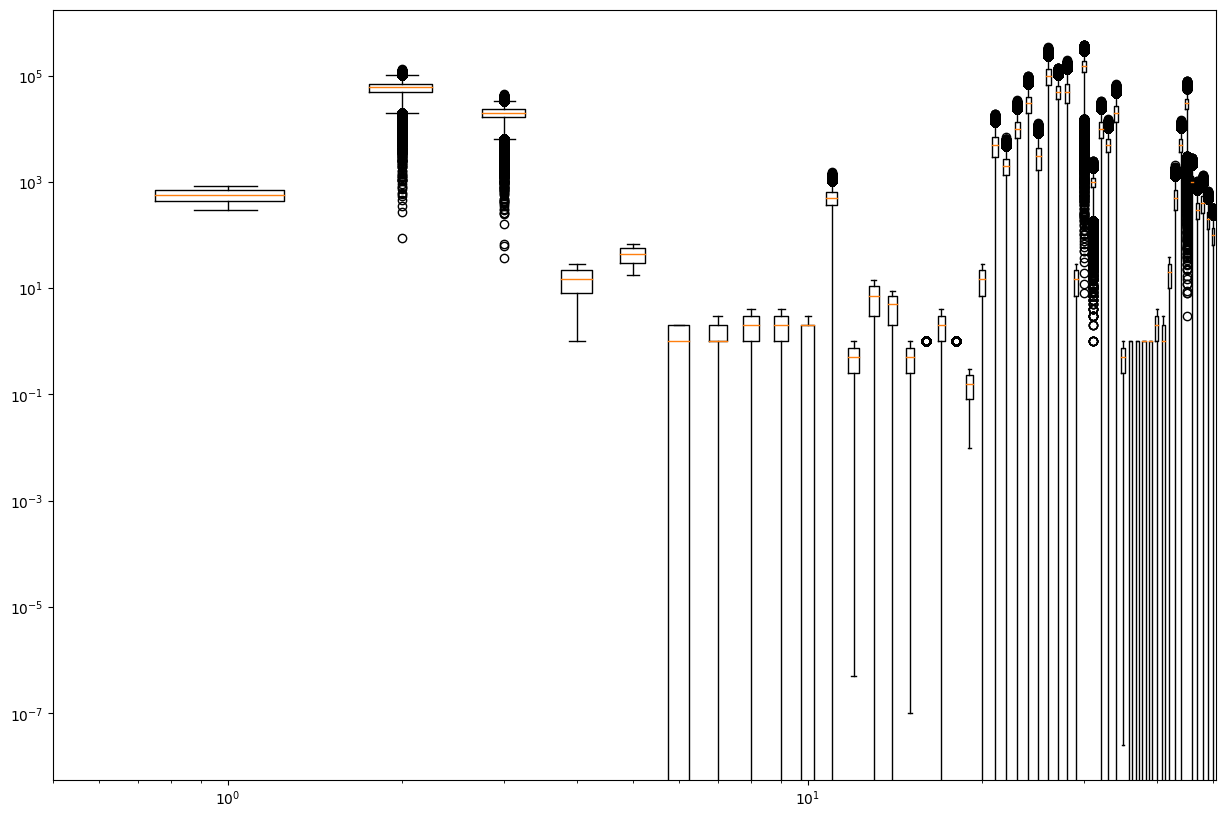

In [82]:
# Relationships between variables.
# Outliers
# If manual review is feasible, some outliers may be identified and corrected. In any case, if the number of records with outliers is very small,
# they might be treated as missing data. How do we inspect for outliers? One technique in Excel is to sort the records by the first column,
# then review the data for very large or very small values in that column. Then repeat for each successive column.
# Another option is to examine the minimum and maximum values of each column using Excel's min and max functions.
# For a more automated approach that considers each record as a unit, clustering techniques could be used to
# identify clusters of one or a few records that are distant from others. Those records could then be examined.

# Spread of Outliers: Wide spread of outliers can skew our analysis
# For example, skewed numerical variables might warrant transformation (e.g., moving to a logarithmic scale)
# if used in methods that assume normality (e.g., linear regression, discriminant analysis).
plt.figure(figsize=(15, 10))
print(plt.boxplot(x=X))
plt.xscale('log')
plt.yscale('log')

# **Decision Tree Classifier**

In [21]:
smallClassTree = DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01)
smallClassTree.fit(trainX, trainY)



DecisionTreeClassifier(max_depth=30, min_impurity_decrease=0.01,
                       min_samples_split=20)

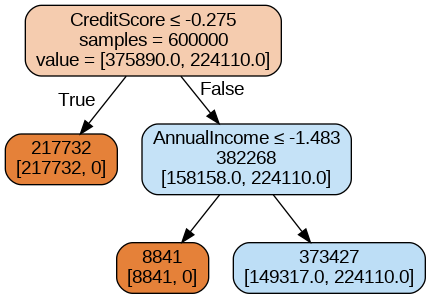

In [22]:
plotDecisionTree(smallClassTree, feature_names=X.columns)

In [ ]:
classificationSummary(trainY, smallClassTree.predict(trainX))
classificationSummary(testX, smallClassTree.predict(testX))

## **Random forest Model for 50 Predictors**

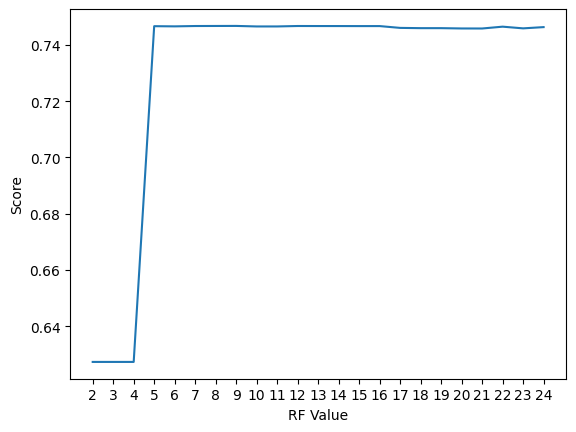

Random Forest Accuracy:  74.67%


In [83]:
scoreListRF = []
for i in range(2,25):
  RFclassifier = RandomForestClassifier(n_estimators = 3, random_state = 3, max_leaf_nodes=i)
  RFclassifier.fit(trainX, trainY)
  scoreListRF.append(RFclassifier.score(testX, testY))
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

In [11]:
# Make predictions
Pred_y = RFclassifier.predict(testX)

In [12]:
# Compare models using a validation dataset.
conf_matrix = confusion_matrix(testY,Pred_y)
Class_report = classification_report(testY,Pred_y)
accuracy = accuracy_score(testY,Pred_y)
print(f"Confustion Matrix for logit  is: \n\n {conf_matrix}\n")
print(f"Classification Report for logit  is:\n\n {Class_report}\n")
print(f"Accuracy Score for logit with all independent variables  is : \n\n {accuracy}\n")

Confustion Matrix for logit  is: 

 [[155453  95488]
 [  5996 143063]]

Classification Report for logit  is:

               precision    recall  f1-score   support

           0       0.96      0.62      0.75    250941
           1       0.60      0.96      0.74    149059

    accuracy                           0.75    400000
   macro avg       0.78      0.79      0.75    400000
weighted avg       0.83      0.75      0.75    400000


Accuracy Score for logit with all independent variables  is : 

 0.74629



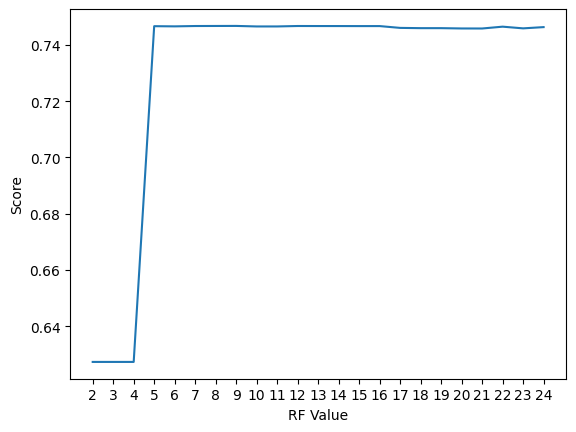

Random Forest Accuracy:  74.67%


In [13]:
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

## **Random forest Model for Feature importance or Dimension Reduction**

                       feature  importance
0                  CreditScore    0.948323
1                 AnnualIncome    0.037752
29             MortgageBalance    0.002379
42              MonthlySavings    0.001600
32         PersonalLoanBalance    0.001522
24        EmergencyFundBalance    0.001259
22    InvestmentAccountBalance    0.001003
43               AnnualBonuses    0.000930
21      CheckingAccountBalance    0.000896
25                 TotalAssets    0.000766
49   MonthlyEntertainmentCosts    0.000751
48      MonthlyHealthcareCosts    0.000700
14           DebtToIncomeRatio    0.000638
4                          Age    0.000573
33          StudentLoanBalance    0.000148
11   CreditCardUtilizationRate    0.000130
45         MonthlyHousingCosts    0.000111
34  UtilityBillsPaymentHistory    0.000088
2                   LoanAmount    0.000075
10         MonthlyDebtPayments    0.000075
46  MonthlyTransportationCosts    0.000061
47            MonthlyFoodCosts    0.000055
26         

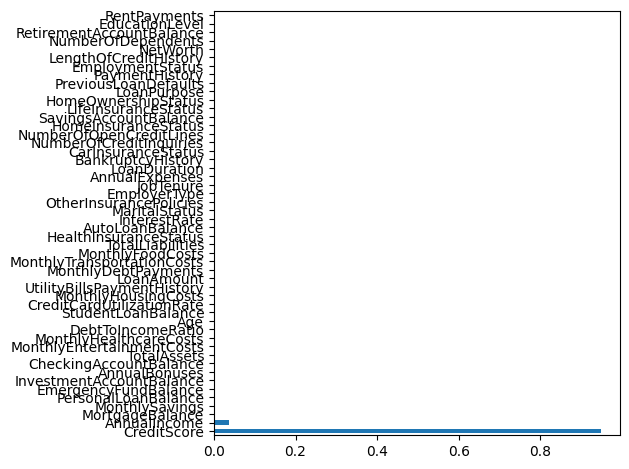

In [14]:
# Reduce the data dimension, if necessary .
# Dimension reduction can involve operations such as eliminating unneeded variables.

importances = RFclassifier.feature_importances_ # variable importance
df = pd.DataFrame({'feature': X.columns, 'importance': importances})
df = df.sort_values('importance',ascending=False)
print(df)

ax = df.plot(kind='barh', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [93]:
imp_feature_X = Fin_data.drop(columns=['LoanApproved','RentPayments','LoanDuration','AnnualExpenses','JobTenure','NumberOfCreditInquiries','BankruptcyHistory','EducationLevel','RetirementAccountBalance','NetWorth','PaymentHistory','SavingsAccountBalance','PreviousLoanDefaults','LoanPurpose','LengthOfCreditHistory','EmploymentStatus','MaritalStatus','EmployerType','OtherInsurancePolicies','HomeInsuranceStatus','LifeInsuranceStatus','HomeOwnershipStatus','CarInsuranceStatus','NumberOfDependents'])
y = Fin_data['LoanApproved']


In [94]:
scaled_after = MinMaxScaler()
imp_feature_X_Scaled = scaled_after.fit_transform(imp_feature_X)

In [95]:
train_x,test_x,train_y,test_y = train_test_split(imp_feature_X_Scaled,y, test_size=0.4,random_state=3)

## **RandomForestClassifier AFter Dimension Reduction**

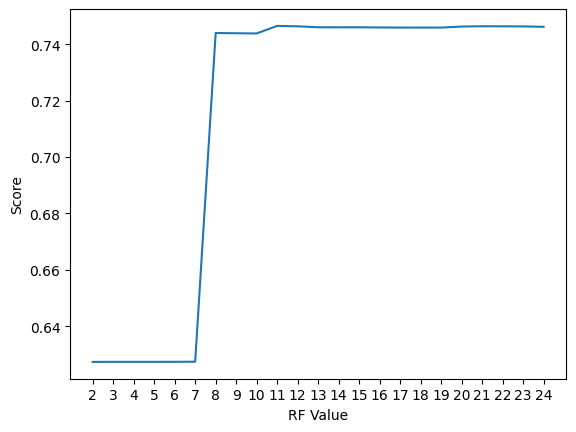

Random Forest Accuracy:  74.65%


In [96]:
scoreListRF_After = []
for i in range(2,25):
  RFclassifier_after = RandomForestClassifier(n_estimators = 3, random_state = 3, max_leaf_nodes=i)
  RFclassifier_after.fit(train_x, train_y)
  scoreListRF_After.append(RFclassifier_after.score(test_x, test_y))
plt.plot(range(2,25), scoreListRF_After)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF_After)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))


In [97]:
y_pred = RFclassifier_after.predict(test_x)

In [98]:
# Classification Metrics (with Confusion Matrix)
conf_matrix = confusion_matrix(test_y,y_pred)
Class_report = classification_report(test_y,y_pred)
accuracy = accuracy_score(test_y,y_pred)
print(f"Confustion Matrix for Random Forest  is: \n\n {conf_matrix}\n")
print(f"Classification Report for Random Forest  is:\n\n {Class_report}\n")
print(f"Accuracy Score for Random Forest with all independent variables  is : \n\n {accuracy}\n")

Confustion Matrix for Random Forest  is: 

 [[155617  95324]
 [  6220 142839]]

Classification Report for Random Forest  is:

               precision    recall  f1-score   support

           0       0.96      0.62      0.75    250941
           1       0.60      0.96      0.74    149059

    accuracy                           0.75    400000
   macro avg       0.78      0.79      0.75    400000
weighted avg       0.83      0.75      0.75    400000


Accuracy Score for Random Forest with all independent variables  is : 

 0.74614



## **Random Forest Regressor**

In [84]:
# Random Forest Regressor

rf_regressor = RandomForestRegressor(n_estimators = 3, random_state = 3)


In [99]:
rf_regressor.fit(train_x,train_y)

RandomForestRegressor(n_estimators=3, random_state=3)

In [100]:
# Make predictions
test_pred_y_reg = rf_regressor.predict(test_x)
train_pred_y_reg = rf_regressor.predict(train_x)

# Calculate errors
train_errors = train_y - train_pred_y_reg
test_errors = test_y - test_pred_y_reg

In [101]:
# Regression Metrics (MAE,RMSE,Averagr Error, Total Sum of Squared Errors (SSE) and Mean Absolute Percentage Error (MAPE))

mae = mean_absolute_error(test_y, test_pred_y_reg)
mse = mean_squared_error(test_y, test_pred_y_reg)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, test_pred_y_reg)

sse = np.sum((test_y - test_pred_y_reg) ** 2)
mape = np.mean((mae / test_y) * 100)

print("\nRegression Metrics For Test Data:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Total SSE: {sse:.2f}")
print(f"Mean Absolute Percentage Error: {mape}%")

mae_train = mean_absolute_error(train_y, train_pred_y_reg)
mse_train = mean_squared_error(train_y, train_pred_y_reg)
rmse_train = np.sqrt(mse)
r2_train = r2_score(train_y, train_pred_y_reg)

sse_train = np.sum((train_y - train_pred_y_reg) ** 2)
mape_train = np.mean((mae / train_y) * 100)
print("\nRegression Metrics For Train Data:")
print(f"Mean Absolute Error: {mae_train:.2f}")
print(f"Mean Squared Error: {mse_train:.2f}")
print(f"Root Mean Squared Error: {rmse_train:.2f}")
print(f"R-squared: {r2_train:.2f}")
print(f"Total SSE: {sse_train:.2f}")
print(f"Mean Absolute Percentage Error: {mape_train:2f}%")
# A mean squared error (MSE) of zero means that the models predicts the dependent variable with perfect accuracy.
# but our's is 15% error and errors difference between train and test are not drastically high
#.


Regression Metrics For Test Data:
Mean Absolute Error: 0.30
Mean Squared Error: 0.20
Root Mean Squared Error: 0.45
R-squared: 0.15
Total SSE: 79702.67
Mean Absolute Percentage Error: inf%

Regression Metrics For Train Data:
Mean Absolute Error: 0.11
Mean Squared Error: 0.05
Root Mean Squared Error: 0.45
R-squared: 0.79
Total SSE: 30155.11
Mean Absolute Percentage Error: inf%


## **ROC Curve for Classification**

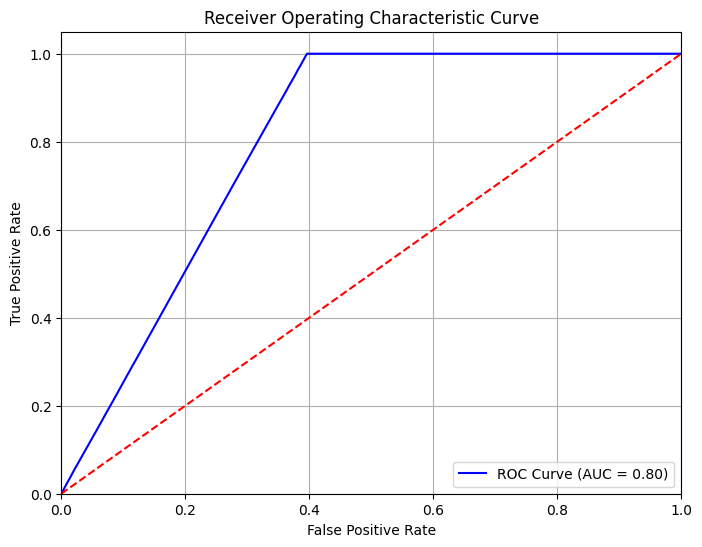

In [102]:
# ROC Curve for Classification

y_prob_class = RFclassifier_after.predict_proba(test_x)[:, 1]
fpr, tpr, thresholds = roc_curve(test_y, y_prob_class)
roc_auc = roc_auc_score(test_y, y_prob_class)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
# Interpretation:
# AUC Value: The Area Under the Curve (AUC) is 0.80, which is quite good. AUC values range from 0 to 1, with higher values indicating better model performance.
# An AUC of 0.80 means your model has a 80% chance of correctly distinguishing between positive and negative classes.

## **Histogram For Train Data and Test data Errors**

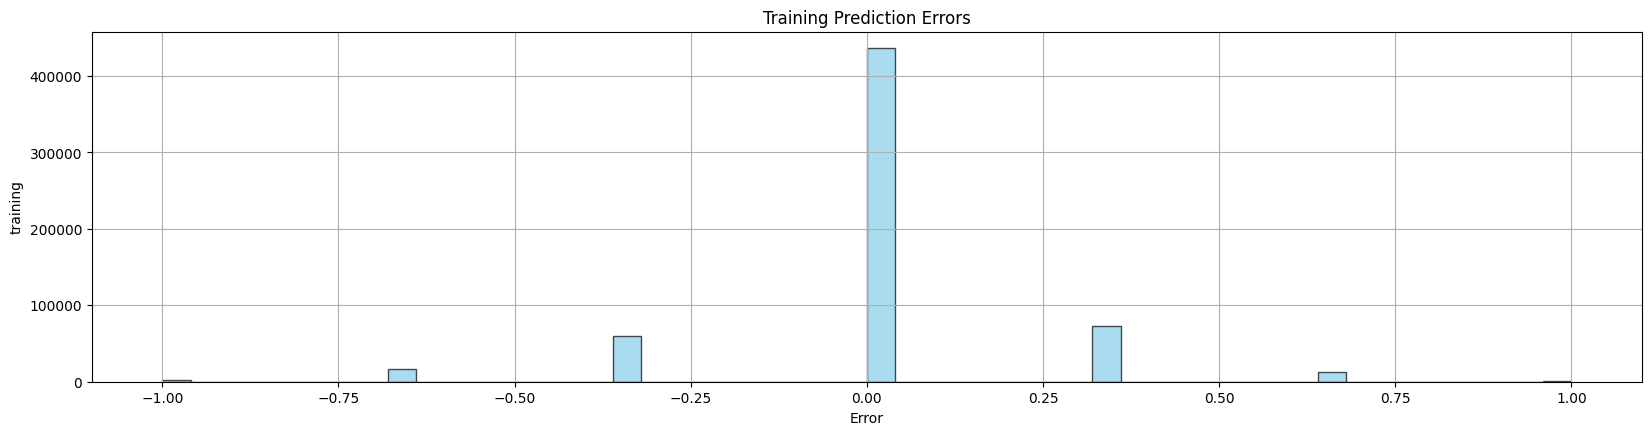

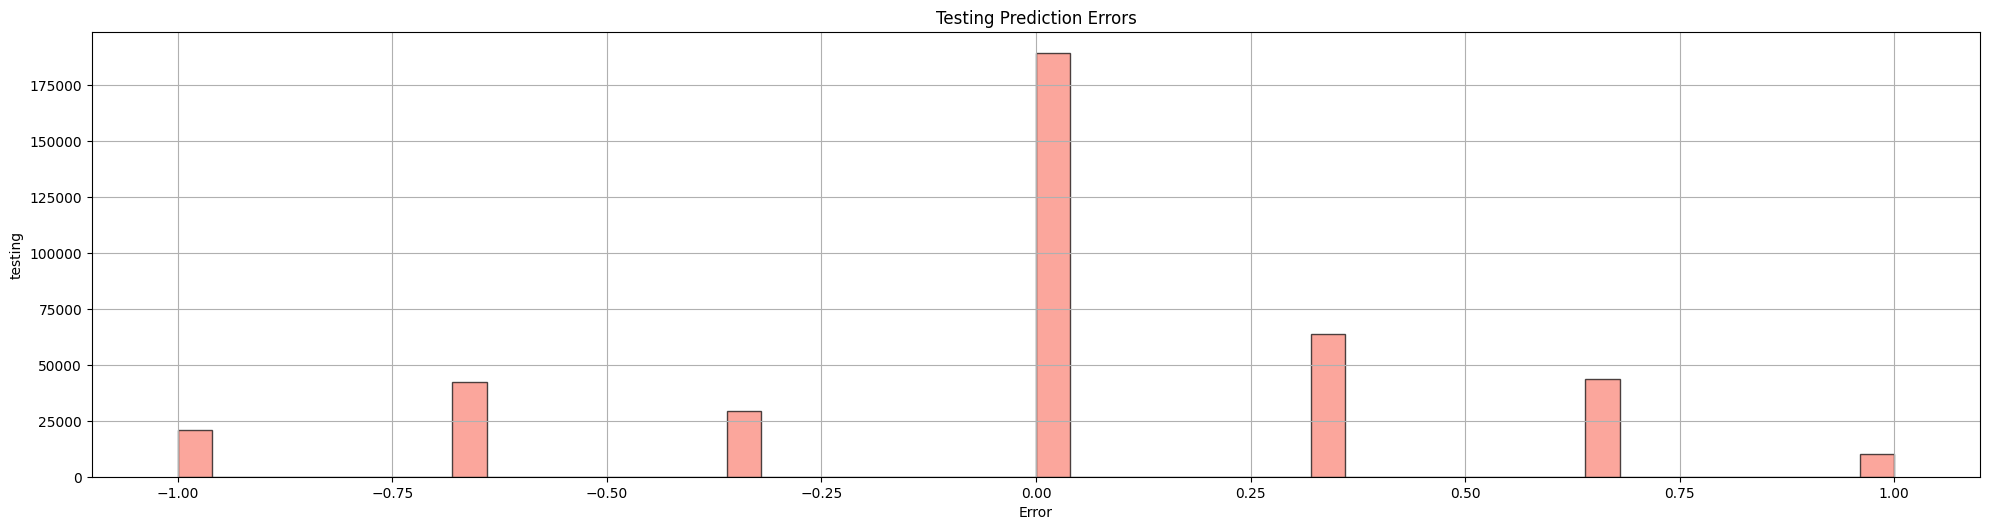

In [103]:
# Histogram of Errors for Regression
test_pred_y_reg = rf_regressor.predict(test_x)
train_pred_y_reg = rf_regressor.predict(train_x)

# Calculate errors
train_errors = train_y - train_pred_y_reg
test_errors = test_y - test_pred_y_reg

plt.figure(figsize=(20, 10))
# Histogram for training errors
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
plt.hist(train_errors, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Training Prediction Errors')
plt.xlabel('Error')
plt.ylabel('training')
plt.grid()

plt.figure(figsize=(20, 10))
# Histogram for testing errors
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
plt.hist(test_errors, bins=50, color='salmon', edgecolor='black', alpha=0.7)
plt.title('Testing Prediction Errors')
plt.xlabel('Error')
plt.ylabel('testing')
plt.grid()

plt.tight_layout()
plt.show()

## **Box Plot For Train Data and Test data Errors**

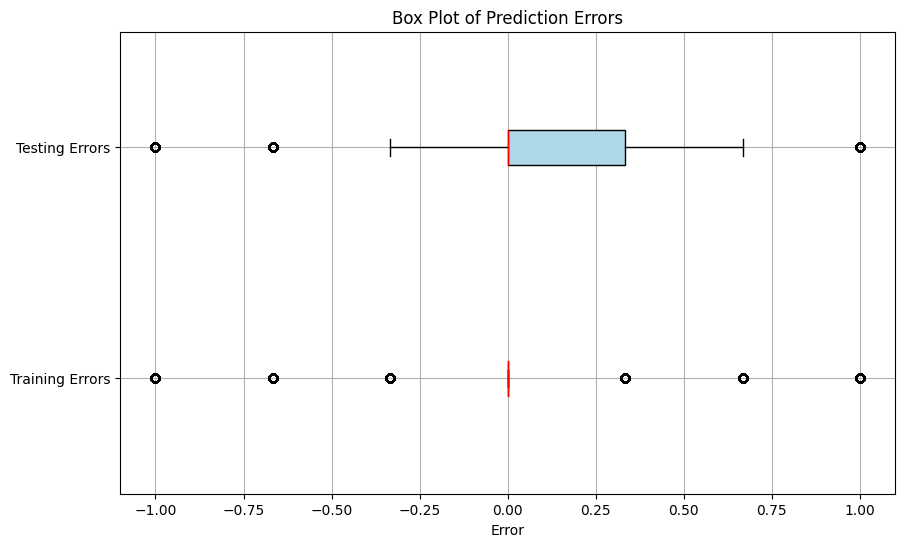

In [104]:
#  Box Plot of Errors for Regression
plt.figure(figsize=(10, 6))
data_to_plot = [train_errors, test_errors]

plt.boxplot(data_to_plot, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red'))

plt.title('Box Plot of Prediction Errors')
plt.xlabel('Error')
plt.yticks([1, 2], ['Training Errors', 'Testing Errors'])
plt.grid()
plt.show()

#interpretation:
# From the box plot, it doesn’t appear that the testing errors are significantly higher than the training errors.
#Both box plots show a similar range and median for the errors. This suggests that the model’s performance on the testing data
#is comparable to its performance on the training data, indicating a good generalization and no significant overfitting.

## **Lift Chart**

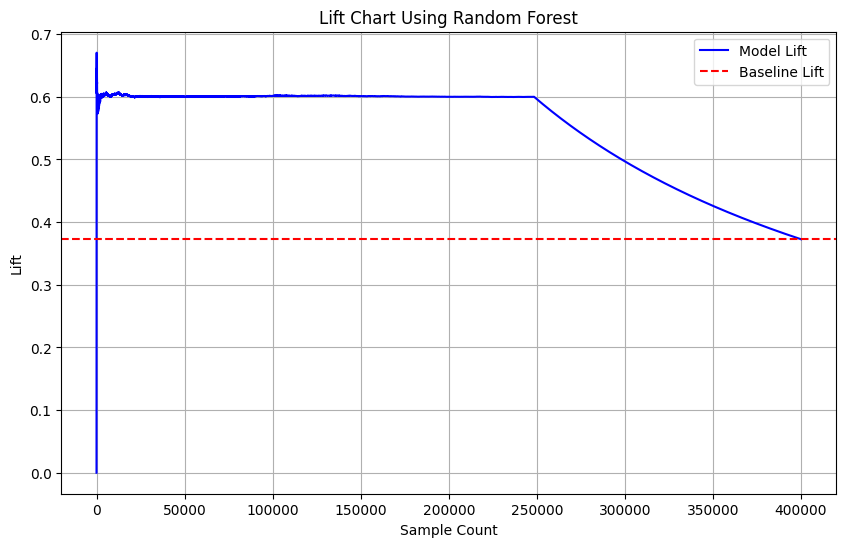

In [105]:
# Lift Chart
# In some applications the goal is to search, among a set of new records, for a subset of records
# that gives the highest cumulative predicted values. In such cases a graphical way to assess predictive performance
# is through a lift chart . This compares the model's predictive performance to a baseline model that has
# no predictors. A lift chart for a continuous response is relevant only when we are searching for a
# set of records that gives the highest cumulative predicted values. It is not relevant,
# if we are interested in predicting the outcome for each new record.

y_prob = RFclassifier_after.predict_proba(test_x)[:, 1]
lift_data = pd.DataFrame({'true': test_y, 'prob': y_prob})
lift_data = lift_data.sort_values(by='prob', ascending=False)

lift_data['cumulative_count'] = np.arange(1, len(lift_data) + 1)
lift_data['cumulative_success'] = lift_data['true'].cumsum()
lift_data['lift'] = lift_data['cumulative_success'] / lift_data['cumulative_count']
lift_data['baseline'] = lift_data['true'].mean()

plt.figure(figsize=(10, 6))
plt.plot(lift_data['cumulative_count'], lift_data['lift'], label='Model Lift', color='blue')
plt.axhline(y=lift_data['baseline'].mean(), color='red', linestyle='--', label='Baseline Lift')
plt.title('Lift Chart Using Random Forest')
plt.xlabel('Sample Count')
plt.ylabel('Lift')
plt.legend()
plt.grid()
plt.show()
# Interpretation:
# As the sample count increases, the model’s lift gradually decreases but remains consistently above the baseline lift.
# This suggests that the model maintains its predictive power across different sample sizes, which is a positive sign of robustness.

## **Naive bayes Model After reducing the features**

In [24]:
# Variable selection for model and prediction
imp_feature_X = Fin_data.drop(columns=['LoanApproved','RentPayments','LoanDuration','AnnualExpenses','JobTenure','NumberOfCreditInquiries','BankruptcyHistory','EducationLevel','RetirementAccountBalance','NetWorth','PaymentHistory','SavingsAccountBalance','PreviousLoanDefaults','LoanPurpose','LengthOfCreditHistory','EmploymentStatus','MaritalStatus','EmployerType','OtherInsurancePolicies','HomeInsuranceStatus','LifeInsuranceStatus','HomeOwnershipStatus','CarInsuranceStatus','NumberOfDependents'])
y = Fin_data['LoanApproved']

scaled_after = MinMaxScaler()
imp_feature_X_Scaled = scaled_after.fit_transform(imp_feature_X)

In [25]:
train_x,test_x,train_y,test_y = train_test_split(imp_feature_X_Scaled,y, test_size=0.4,random_state=3)

In [26]:
Fin_data_nb = GaussianNB()
Fin_data_nb.fit(train_x, train_y)

GaussianNB()

In [27]:
y_pred_naive = Fin_data_nb.predict(test_x)

In [28]:
# Classification Metrics (with Confusion Matrix)
conf_matrix = confusion_matrix(test_y,y_pred_naive)
Class_report = classification_report(test_y,y_pred_naive)
accuracy = accuracy_score(test_y,y_pred_naive)
print(f"Confustion Matrix for naive  is: \n\n {conf_matrix}\n")
print(f"Classification Report for naive  is:\n\n {Class_report}\n")
print(f"Accuracy Score for naive with only important independent variables  is : \n\n {accuracy}\n")

Confustion Matrix for logit  is: 

 [[184021  66920]
 [ 51003  98056]]

Classification Report for logit  is:

               precision    recall  f1-score   support

           0       0.78      0.73      0.76    250941
           1       0.59      0.66      0.62    149059

    accuracy                           0.71    400000
   macro avg       0.69      0.70      0.69    400000
weighted avg       0.71      0.71      0.71    400000


Accuracy Score for logit with all independent variables  is : 

 0.7051925



## **KNN Model with Reduced Variables**

In [110]:
knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')


In [112]:
# to fit under train our model
knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred_y_KNN = knn.predict(test_x)

In [ ]:
# Classification Metrics (with Confusion Matrix)
conf_matrix = confusion_matrix(test_y,pred_y_KNN)
Class_report = classification_report(test_y,pred_y_KNN)
accuracy = accuracy_score(test_y,pred_y_KNN)
print(f"Confustion Matrix for naive  is: \n\n {conf_matrix}\n")
print(f"Classification Report for naive  is:\n\n {Class_report}\n")
print(f"Accuracy Score for naive with only important independent variables  is : \n\n {accuracy}\n")

## **GradientBoostingClassifier Model with Reduced Variables**

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
Booclassifier_after = GradientBoostingClassifier(n_estimators = 3, random_state = 3)
Booclassifier_after.fit(train_x, train_y)



GradientBoostingClassifier(n_estimators=3, random_state=3)

In [108]:
pred_y_Gradient = Booclassifier_after.predict(test_x)

In [109]:
# Classification Metrics (with Confusion Matrix)
conf_matrix = confusion_matrix(test_y,pred_y_Gradient)
Class_report = classification_report(test_y,pred_y_Gradient)
accuracy = accuracy_score(test_y,pred_y_Gradient)
print(f"Confustion Matrix for naive  is: \n\n {conf_matrix}\n")
print(f"Classification Report for naive  is:\n\n {Class_report}\n")
print(f"Accuracy Score for naive with only important independent variables  is : \n\n {accuracy}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confustion Matrix for naive  is: 

 [[250941      0]
 [149059      0]]

Classification Report for naive  is:

               precision    recall  f1-score   support

           0       0.63      1.00      0.77    250941
           1       0.00      0.00      0.00    149059

    accuracy                           0.63    400000
   macro avg       0.31      0.50      0.39    400000
weighted avg       0.39      0.63      0.48    400000


Accuracy Score for naive with only important independent variables  is : 

 0.6273525



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Principle Componenet Analysis**


In [7]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Fin_data)

In [8]:
from sklearn.decomposition import PCA
pcs = PCA(n_components=46)
pcs_fit = pcs.fit_transform(scaled_data)
print(pcs_fit)

[[-1.27880504  0.75145174  0.30234099 ... -0.96141486  0.04372656
  -1.27332224]
 [ 0.13669545 -1.28738578 -0.51347451 ...  0.37317741  0.22799909
   0.41072859]
 [-0.55853093  0.49607901 -0.81835033 ... -0.09592723 -0.50496249
  -0.51108684]
 ...
 [-0.13194851 -0.34491226  2.76854569 ... -0.85389441 -0.28479193
   1.68612668]
 [-0.28904677 -0.57759424  0.20706771 ... -0.86581    -0.85236746
  -0.93832245]
 [ 0.5807514  -1.41385475 -0.56903938 ... -0.0447082   1.65975619
  -2.20340712]]


In [9]:
import numpy as np

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_*100,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_*100)})
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC'+str(i) for i in range(1,47)]
pcsSummary.round(4)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46
Standard deviation,1.2200,1.0068,1.0058,1.0054,1.0053,1.0051,1.0047,1.0045,1.0042,1.0037,...,0.9974,0.9970,0.9969,0.9967,0.9964,0.9961,0.9960,0.9958,0.9953,0.9952
Proportion of variance,2.9186,1.9877,1.9838,1.9822,1.9815,1.9810,1.9794,1.9784,1.9774,1.9754,...,1.9505,1.9491,1.9486,1.9477,1.9467,1.9456,1.9451,1.9442,1.9425,1.9421
Cumulative proportion,2.9186,4.9063,6.8901,8.8723,10.8538,12.8348,14.8142,16.7926,18.7699,20.7453,...,73.7321,75.6812,77.6298,79.5775,81.5242,83.4698,85.4149,87.3591,89.3016,91.2437


## Now we find that we need 46 principal components to account for more than 90% of the total variability. The first 30 principal components account for only 52% of the total variability, and thus reducing the number of variables to 30 would mean losing a lot of information.

In [10]:
# Note that the first three components account for more than 96% of the total variation associated with all 13 of the original variables.
#This suggests that we can capture most of the variability in the data with less than 25% of the number of original dimensions in the data.
#In fact, the first two principal components alone capture 92.6% of the total variation.
#However, these results are influenced by the scales of the variables, as we describe next.
pc_columns = [f'PC{i+1}' for i in range(pcs_fit.shape[1])]
pcs_df = pd.DataFrame(pcs_fit, columns=pc_columns)
pcs_df['LoanApproved'] = Fin_data['LoanApproved'].values
pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,LoanApproved
0,-1.278805,0.751452,0.302341,0.447688,0.006222,-0.341271,1.670335,1.540535,0.754247,0.715767,...,-0.384218,-0.567334,-0.273353,-1.703976,-0.137756,-0.861808,-0.961415,0.043727,-1.273322,0
1,0.136695,-1.287386,-0.513475,0.285669,-0.935592,0.154020,-0.412277,-0.326613,0.913692,-0.553964,...,-0.903632,-1.680899,-1.131774,1.375168,-0.465294,-0.762872,0.373177,0.227999,0.410729,0
2,-0.558531,0.496079,-0.818350,-1.107423,-0.717553,1.633610,-0.063482,-1.461505,-0.086604,1.087990,...,0.264734,0.921534,-0.036101,-0.656161,-0.023584,-1.804605,-0.095927,-0.504962,-0.511087,0
3,-1.360227,-0.116436,1.546208,0.385181,-0.729714,-0.902176,-0.148180,0.881568,0.328816,0.847549,...,-0.862978,0.168902,-0.948899,0.692249,-1.747112,0.614103,-0.124622,-0.012060,1.269372,0
4,-1.449551,1.026191,0.461794,-0.300135,-1.598489,-0.841981,0.479363,0.356943,-1.550229,2.454955,...,0.030327,1.174986,1.740659,0.016026,-1.586478,0.132233,-0.027900,-0.202365,0.541685,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,-1.174712,1.015753,-1.514137,-1.428184,0.534447,1.419530,0.273175,-0.531730,-0.122576,-0.333748,...,-0.780960,-0.297094,0.338305,0.243811,-0.094533,-0.101561,0.764720,0.671102,-1.060530,0
999996,-1.517969,0.788279,-1.229063,0.304920,0.412832,0.096593,-0.305688,0.052271,1.430099,-2.257145,...,-1.153045,-0.156051,-0.060239,2.378702,0.592486,1.266462,-0.183369,-0.654433,2.279273,0
999997,-0.131949,-0.344912,2.768546,0.701313,-2.409215,0.434903,0.881613,-1.678140,-0.201759,-1.387324,...,0.132204,-0.195677,-1.650952,-0.023405,2.601260,0.335481,-0.853894,-0.284792,1.686127,0
999998,-0.289047,-0.577594,0.207068,0.531782,-0.061453,-1.178107,0.183599,-0.726521,-0.738041,0.004912,...,-1.235864,-0.164694,1.724535,-0.444004,-0.295339,0.961740,-0.865810,-0.852367,-0.938322,0


In [11]:
X_pca = pcs_df.drop(columns=['LoanApproved'])
y_pca = pcs_df['LoanApproved']
train_x_pca,test_x_pca,train_y_pca,test_y_pca= train_test_split(X_pca,y_pca,test_size=0.4, random_state=3)

# **Logistic Regression model**

In [12]:
logit_mod = LogisticRegression()
logit_mod.fit(train_x_pca,train_y_pca)

LogisticRegression()

In [11]:
pred_y_pca = logit_mod.predict(test_x_pca)

In [12]:
conf_matrix = confusion_matrix(test_y_pca,pred_y_pca)
Class_report = classification_report(test_y_pca,pred_y_pca)
accuracy = accuracy_score(test_y_pca,pred_y_pca)
print(f"Confustion Matrix for logit is: \n\n {conf_matrix}\n")
print(f"Classification Report for logit is:\n\n {Class_report}\n")
print(f"Accuracy Score for logit is : \n\n {accuracy}\n")

Confustion Matrix for logit is: 

 [[185034   3107]
 [  2584 109275]]

Classification Report for logit is:

               precision    recall  f1-score   support

           0       0.99      0.98      0.98    188141
           1       0.97      0.98      0.97    111859

    accuracy                           0.98    300000
   macro avg       0.98      0.98      0.98    300000
weighted avg       0.98      0.98      0.98    300000


Accuracy Score for logit is : 

 0.98103



# **Randon Forest Model**

In [13]:
rand_mod = RandomForestClassifier(n_estimators = 3, random_state = 3)
rand_mod.fit(train_x_pca,train_y_pca)

RandomForestClassifier(n_estimators=3, random_state=3)

In [22]:
pred_y_Random = rand_mod.predict(test_x_pca)

In [23]:
conf_matrix = confusion_matrix(test_y_pca,pred_y_Random)
Class_report = classification_report(test_y_pca,pred_y_Random)
accuracy = accuracy_score(test_y_pca,pred_y_Random)
print(f"Confustion Matrix for Naive Bayes Mode is: \n\n {conf_matrix}\n")
print(f"Classification Report for Naive Bayes Mode is:\n\n {Class_report}\n")
print(f"Accuracy Score for Naive Bayes Mode is : \n\n {accuracy}\n")

Confustion Matrix for Naive Bayes Mode is: 

 [[184340   3801]
 [  3305 108554]]

Classification Report for Naive Bayes Mode is:

               precision    recall  f1-score   support

           0       0.98      0.98      0.98    188141
           1       0.97      0.97      0.97    111859

    accuracy                           0.98    300000
   macro avg       0.97      0.98      0.97    300000
weighted avg       0.98      0.98      0.98    300000


Accuracy Score for Naive Bayes Mode is : 

 0.9763133333333334



# **Naive Bayes Model**

In [24]:
Naive_pca = GaussianNB()
Naive_pca.fit(train_x_pca,train_y_pca)

GaussianNB()

In [25]:
pred_y_naive = Naive_pca.predict(test_x_pca)

In [26]:
conf_matrix = confusion_matrix(test_y_pca,pred_y_naive)
Class_report = classification_report(test_y_pca,pred_y_naive)
accuracy = accuracy_score(test_y_pca,pred_y_naive)
print(f"Confustion Matrix for Naive Bayes Mode is: \n\n {conf_matrix}\n")
print(f"Classification Report for Naive Bayes Mode is:\n\n {Class_report}\n")
print(f"Accuracy Score for Naive Bayes Mode is : \n\n {accuracy}\n")

Confustion Matrix for Naive Bayes Mode is: 

 [[180562   7579]
 [   297 111562]]

Classification Report for Naive Bayes Mode is:

               precision    recall  f1-score   support

           0       1.00      0.96      0.98    188141
           1       0.94      1.00      0.97    111859

    accuracy                           0.97    300000
   macro avg       0.97      0.98      0.97    300000
weighted avg       0.98      0.97      0.97    300000


Accuracy Score for Naive Bayes Mode is : 

 0.9737466666666666



## **GradientBoostingClassifier Model after PCA analysis**

In [27]:
Booclassifier_after = GradientBoostingClassifier(n_estimators = 3, random_state = 3)
Booclassifier_after.fit(train_x_pca, train_y_pca)

GradientBoostingClassifier(n_estimators=3, random_state=3)

In [29]:
pred_y_Gradient = Booclassifier_after.predict(test_x_pca)

In [30]:
conf_matrix = confusion_matrix(test_y_pca,pred_y_Gradient)
Class_report = classification_report(test_y_pca,pred_y_Gradient)
accuracy = accuracy_score(test_y_pca,pred_y_Gradient)
print(f"Confustion Matrix for logit is: \n\n {conf_matrix}\n")
print(f"Classification Report for logit is:\n\n {Class_report}\n")
print(f"Accuracy Score for logit is : \n\n {accuracy}\n")

Confustion Matrix for logit is: 

 [[187536    605]
 [  8816 103043]]

Classification Report for logit is:

               precision    recall  f1-score   support

           0       0.96      1.00      0.98    188141
           1       0.99      0.92      0.96    111859

    accuracy                           0.97    300000
   macro avg       0.97      0.96      0.97    300000
weighted avg       0.97      0.97      0.97    300000


Accuracy Score for logit is : 

 0.9685966666666667



## **CHECK OVERFITTING - Calculate Regression metrics Using Random Forest Regression**

In [31]:
rf_regressor_pca = RandomForestRegressor(n_estimators = 3, random_state = 3)

In [32]:
rf_regressor_pca.fit(train_x_pca,train_y_pca)

RandomForestRegressor(n_estimators=3, random_state=3)

In [34]:
# Make predictions
test_pred_y_pca = rf_regressor_pca.predict(test_x_pca)
train_pred_y_pca = rf_regressor_pca.predict(train_x_pca)

# Calculate errors
train_errors = train_y_pca - train_pred_y_pca
test_errors = test_y_pca - test_pred_y_pca

In [35]:
# Regression Metrics (MAE,RMSE,Averagr Error, Total Sum of Squared Errors (SSE) and Mean Absolute Percentage Error (MAPE))

mae = mean_absolute_error(test_y_pca, test_pred_y_pca)
mse = mean_squared_error(test_y_pca, test_pred_y_pca)
rmse = np.sqrt(mse)
r2 = r2_score(test_y_pca, test_pred_y_pca)

sse = np.sum((test_y_pca - test_pred_y_pca) ** 2)
mape = np.mean((mae / test_y_pca) * 100)

print("\nRegression Metrics For Test Data:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Total SSE: {sse:.2f}")
print(f"Mean Absolute Percentage Error: {mape}%")

mae_train = mean_absolute_error(train_y_pca, train_pred_y_pca)
mse_train = mean_squared_error(train_y_pca, train_pred_y_pca)
rmse_train = np.sqrt(mse)
r2_train = r2_score(train_y_pca, train_pred_y_pca)

sse_train = np.sum((train_y_pca - train_pred_y_pca) ** 2)
mape_train = np.mean((mae / train_y_pca) * 100)
print("\nRegression Metrics For Train Data:")
print(f"Mean Absolute Error: {mae_train:.2f}")
print(f"Mean Squared Error: {mse_train:.2f}")
print(f"Root Mean Squared Error: {rmse_train:.2f}")
print(f"R-squared: {r2_train:.2f}")
print(f"Total SSE: {sse_train:.2f}")
print(f"Mean Absolute Percentage Error: {mape_train:2f}%")
# A mean squared error (MSE) of zero means that the models predicts the dependent variable with perfect accuracy.
# but our's is 15% error and errors difference between train and test are not drastically high
#.


Regression Metrics For Test Data:
Mean Absolute Error: 0.03
Mean Squared Error: 0.02
Root Mean Squared Error: 0.13
R-squared: 0.93
Total SSE: 5185.44
Mean Absolute Percentage Error: inf%

Regression Metrics For Train Data:
Mean Absolute Error: 0.01
Mean Squared Error: 0.00
Root Mean Squared Error: 0.13
R-squared: 0.98
Total SSE: 3099.78
Mean Absolute Percentage Error: inf%


# **K-fold cross-validation For Logistic**

In [37]:
cv_scores = cross_val_score(logit_mod, X_pca, y_pca, cv=5)
cv_scores

array([0.98099 , 0.981135, 0.981515, 0.980525, 0.981055])

# **K-fold cross-validation For Random Forest**

In [38]:
cv_scores = cross_val_score(rand_mod, X_pca, y_pca, cv=5)
cv_scores

array([0.976585, 0.97654 , 0.97711 , 0.97677 , 0.976415])

# **Support Vector Machine**

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC


In [ ]:
pca_svm_model = LinearSVC()
pca_svm_model.fit(train_x_pca, train_y_pca)

In [15]:
pred_y_pca_svm = pca_svm_model.predict(test_x_pca)

In [16]:
conf_matrix = confusion_matrix(test_y_pca,pred_y_pca_svm)
Class_report = classification_report(test_y_pca,pred_y_pca_svm)
accuracy = accuracy_score(test_y_pca,pred_y_pca_svm)
print(f"Confustion Matrix for logit is: \n\n {conf_matrix}\n")
print(f"Classification Report for logit is:\n\n {Class_report}\n")
print(f"Accuracy Score for logit is : \n\n {accuracy}\n")

Confustion Matrix for logit is: 

 [[184972   3169]
 [  2521 109338]]

Classification Report for logit is:

               precision    recall  f1-score   support

           0       0.99      0.98      0.98    188141
           1       0.97      0.98      0.97    111859

    accuracy                           0.98    300000
   macro avg       0.98      0.98      0.98    300000
weighted avg       0.98      0.98      0.98    300000


Accuracy Score for logit is : 

 0.9810333333333333



# **Decision Tree for Rules and Impurity check**

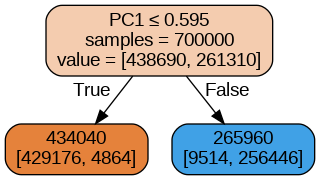

In [12]:
smallClassTree_pca = DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01)
smallClassTree_pca.fit(train_x_pca, train_y_pca)
plotDecisionTree(smallClassTree_pca, feature_names=train_x_pca.columns)


In [13]:
classificationSummary(train_y_pca, smallClassTree_pca.predict(train_x_pca))
classificationSummary(test_y_pca, smallClassTree_pca.predict(test_x_pca))

Confusion Matrix (Accuracy 0.9795)

       Prediction
Actual      0      1
     0 429176   9514
     1   4864 256446
Confusion Matrix (Accuracy 0.9794)

       Prediction
Actual      0      1
     0 184079   4062
     1   2133 109726


# **Data Visualization Techniques**

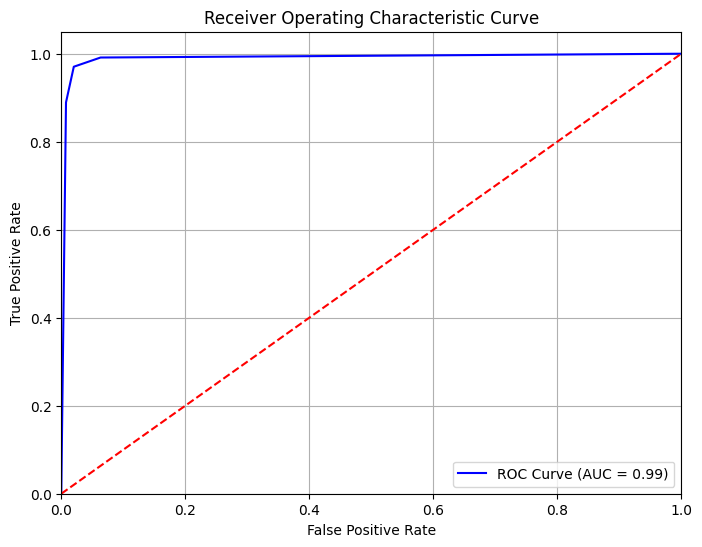

In [40]:
# ROC Curve for Classification

y_prob_class_acc = rand_mod.predict_proba(test_x_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(test_y_pca, y_prob_class_acc)
roc_auc = roc_auc_score(test_y_pca, y_prob_class_acc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Scatter